In [14]:
from simulations.pixel_array import pixelarrayQPC
from optimization.trajectory_optimization import trajectory_func_to_optimize
from optimization.cma2 import optimize_cma, resume_cma
from lossfunctions.staircasiness import staircasiness
from datahandling.datahandling import datahandler
import numpy as np
from functools import partial
from multiprocessing import cpu_count
import matplotlib.pyplot as plt

In [2]:
start=-3
stop=2
steps=200

# Parameters for QPC
disorder=0.3
outer_gates=-3
B_field=0
energy=1

# Parameters for optimization algorithm
# bounds=(-1,1)
# pfactor=0.001

# Initialize loss function
stairs=staircasiness(delta=0.05,last_step=20)

# Set common voltage sweep
common_voltages=np.linspace(start,stop,steps)


# Initialize QPC instance and set parameters
QPC=pixelarrayQPC(plot=False)

QPC.U0=disorder
QPC.energy=energy
QPC.V1=outer_gates
QPC.V11=outer_gates
QPC.phi=B_field

dat=datahandler('fourier_modes',QPC=QPC)

# test_run=QPC.parallel_transmission(common_voltages,num_cpus=cpu_count())
# with plt.style.context('classic'):
#     plt.plot(common_voltages,test_run)

In [3]:
order=2
start_point=np.zeros(shape=(order,8)).ravel()
kwargs={'common_mode':common_voltages,'QPC_instance':QPC,'order':order,'loss_function':stairs.window_loss,'bounds':(-9,9),'pfactor':0.001,'num_cpus':cpu_count()}
actual_func_to_minimize=partial(trajectory_func_to_optimize,**kwargs)
result=optimize_cma(actual_func_to_minimize,dat,start_point,maxfevals=99999,sigma=0.5,stop_time=3600)


data saved to:
/Users/qdev_26/Documents/PhD/kwantrl/kwantrl_data/outcmaes/9/
(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 16 (seed=920528, Mon Jan 10 13:57:53 2022)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     12 9.298822070985548e-01 1.0e+00 4.64e-01  5e-01  5e-01 3:40.1
    2     24 9.599839390998751e-01 1.1e+00 4.50e-01  4e-01  5e-01 7:20.6
    3     36 9.416322069339832e-01 1.2e+00 4.54e-01  4e-01  5e-01 10:59.1
    4     48 9.338706091251043e-01 1.2e+00 4.55e-01  4e-01  5e-01 14:38.0
    5     60 9.370873513477599e-01 1.3e+00 4.36e-01  4e-01  4e-01 18:17.0
    6     72 9.381303848325694e-01 1.3e+00 4.25e-01  4e-01  4e-01 21:55.6
    7     84 9.222162503390060e-01 1.3e+00 4.27e-01  4e-01  4e-01 25:33.4
    8     96 9.368650240036965e-01 1.4e+00 4.32e-01  4e-01  4e-01 28:59.6
    9    108 9.195744826886042e-01 1.4e+00 4.27e-01  4e-01  4e-01 32:26.4
   10    120 9.044990815285817e-01 1.4e+00 4.12e-01  4e-01  4e-01 35:52.6
   11    132 9.438504

In [29]:
import json
with open(dat.data_path+f'outcmaes/{result[2]}/datadict.txt','rb') as file:
    results_dict=json.load(file)


In [30]:
losses=[]
xs=[]
voltages=[]
staircases=[]
for key in range(len(results_dict['measurements'])):
    losses.append(results_dict['measurements'][str(key)]['loss'])
    voltages.append(results_dict['measurements'][str(key)]['voltages'])
    staircases.append(results_dict['measurements'][str(key)]['staircase'])
    xs.append(results_dict['measurements'][str(key)]['x'])

[2.591347856821642, 1.2244928416410263, -0.05508761296824842, 0.5830028577875166, -4.348812233637377, 2.400068375108601, -0.20736143944219737, 1.5493173824597959, 0.2002842547864665, 1.093977613338493, 0.63030765619297, -2.2498683167007654, 1.2752431607248529, -3.20890487436598, 3.501041632524076, -1.3950114121941748]


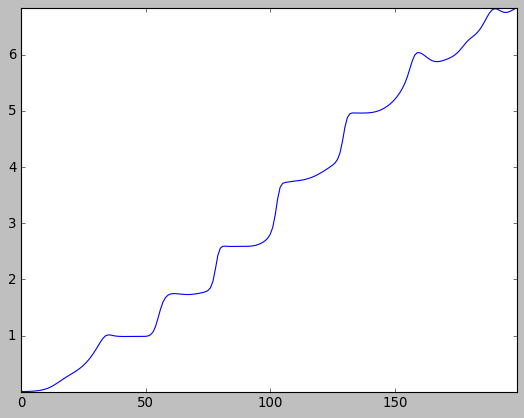

In [31]:
with plt.style.context('classic'):
    plt.plot(staircases[np.argmin(losses)])
    print(xs[np.argmin(losses)])


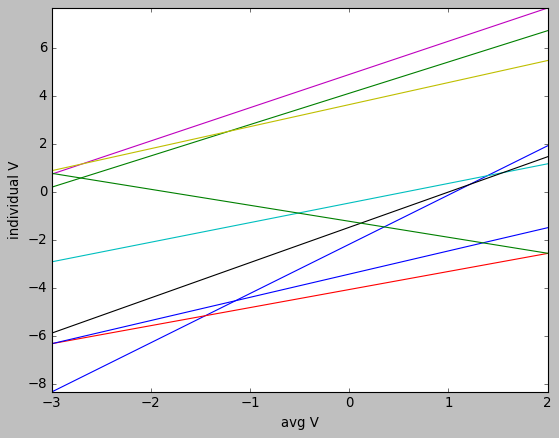

In [32]:
array_voltages=np.array(voltages[np.argmin(losses)])
with plt.style.context('classic'):
    plt.figure()
    for i in range(9):
        plt.plot(common_voltages,array_voltages[:,i])
    plt.xlabel('avg V')
    plt.ylabel('individual V')

In [22]:
loss_funcs=[stairs.deriv_metric_zeros1,
            stairs.stairLossFunk2,
            stairs.window_loss]

loss_new=[]
for staircase in staircases:
    temp=[]
    for func in loss_funcs:
        temp.append(func(np.array(staircase)))
    loss_new.append(temp)
loss_new=np.array(loss_new)

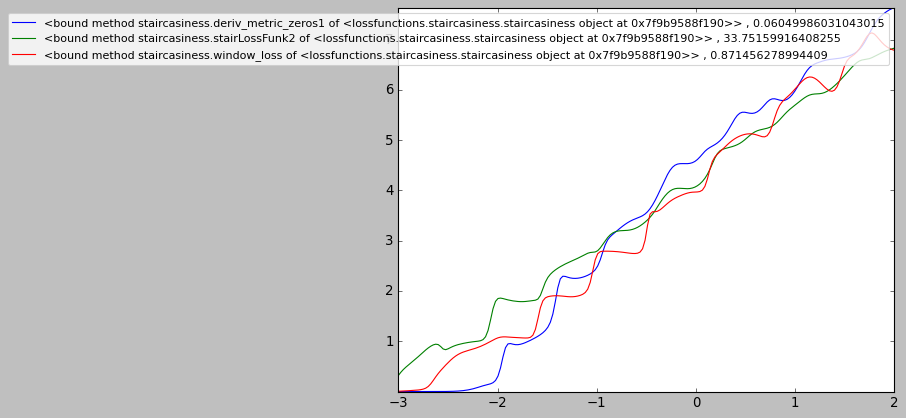

In [23]:

with plt.style.context('classic'):
    plt.figure()
    for i in range(3):
        plt.plot(common_voltages,staircases[np.argmin(loss_new[:,i])],label=f'{str(loss_funcs[i])} , {np.min(loss_new[:,i])}')
plt.legend()

In [10]:
loss_new[:,2]

array([0.92988221, 0.98466091, 0.97134319, 0.96679844, 0.9632579 ,
       0.99724144, 0.95008443, 0.96369235, 0.97430876, 0.96573952,
       0.96443122, 0.96753478, 0.96163056, 0.97019814, 0.99477607,
       0.96474156, 0.96658253, 0.96832044, 0.96327461, 0.96851795,
       0.96821057, 0.96877005, 0.95998394, 0.96969991, 0.94163221,
       0.95170975, 0.94344058, 0.97147033, 0.96760663, 0.9491197 ,
       0.95784963, 0.96948116, 0.96014962, 0.9707488 , 0.9753977 ,
       0.97946975, 0.97070921, 1.00929445, 0.95497509, 0.95832972,
       0.93387061, 0.96937985, 0.95130589, 0.94163827, 0.94614415,
       0.93977876, 0.95793967, 0.93996804, 0.97749427, 0.96231532,
       0.93718503, 0.97128649, 0.96979788, 0.97531163, 0.9759665 ,
       0.97354356, 0.97171563, 0.93708735, 0.96216173, 0.94333103,
       0.96551739, 0.97407672, 0.97705107, 0.95673755, 0.94298686,
       0.95922959, 0.95616303, 0.96041526, 0.97042085, 0.93813038,
       0.97288355, 0.9770108 , 0.95584288, 0.96865923, 0.96253

In [28]:
result=resume_cma(actual_func_to_minimize,9,dat,stop_time=6*3600)

data loaded from:
/Users/qdev_26/Documents/PhD/kwantrl/kwantrl_data/outcmaes/9/
   69    829 8.642005224424857e-01 3.6e+00 2.43e-01  2e-01  3e-01 244:38.7
   70    841 8.624633060787233e-01 3.6e+00 2.26e-01  1e-01  3e-01 248:16.2
   71    853 8.554093859703009e-01 3.6e+00 2.14e-01  1e-01  3e-01 251:53.3
   72    865 8.606827074555219e-01 3.7e+00 2.02e-01  1e-01  2e-01 255:30.5
   73    877 8.632595714773729e-01 3.7e+00 1.94e-01  1e-01  2e-01 259:07.2
   74    889 8.429456666604862e-01 3.7e+00 1.85e-01  1e-01  2e-01 262:40.6
   75    901 8.449755679476970e-01 3.7e+00 1.73e-01  1e-01  2e-01 266:06.4
   76    913 8.366650713130093e-01 3.7e+00 1.65e-01  1e-01  2e-01 269:32.2
   77    925 8.450919909303138e-01 3.9e+00 1.65e-01  1e-01  2e-01 272:57.8
   78    937 8.382197574484266e-01 3.9e+00 1.73e-01  1e-01  2e-01 276:23.5
   79    949 8.556210598649729e-01 3.8e+00 1.73e-01  1e-01  2e-01 279:49.0
   80    961 8.551235914608050e-01 3.9e+00 1.74e-01  1e-01  2e-01 283:14.7
   81    973 8.50673